In [ ]:
-Wave No hergün 1’den başlar

- Ekipman/ personel maliyetin için günlük max toplama miktarı kısıtımız aşağıdaki gibi olacaktır:
01 operasyonu için: 25.000
02 operasyonu için: 175.000

- Sipariş Edilen Tarih < Toplama Tarihi < Sevkiyat Tarihi

In [41]:
import pandas as pd

In [42]:
picking_df = pd.read_csv('datathon_picking.csv', index_col='Unnamed: 0')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,5,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [43]:
picking_df.head()

,Siparis No,Siparis Tipi,Urun Kodu,Toplanan Miktar,Toplama Tarihi,Toplama Saati,Siparişin Düştüğü Tarih,Sevkiyat Tarihi,Müşteri,Operasyon Numarası
0,72616784,10.0,61000058,45,28122019,11:10,26122019,2012020,C10005,O1
1,72616784,10.0,61000058,45,28122019,11:11,26122019,2012020,C10005,O1
2,72616784,10.0,61000058,45,28122019,11:11,26122019,2012020,C10005,O1
3,72616784,10.0,61000058,45,28122019,11:12,26122019,2012020,C10005,O1
4,72616784,10.0,61000058,45,28122019,11:10,26122019,2012020,C10005,O1


In [44]:
picking_df.columns = ['order_num', 'order_type', 'material_num', 'picked_amount', 'picking_date', 
                      'picking_hour', 'order_receive_date', 'shipping_date', 'customer_num', 'operation_type']

In [ ]:
# from analysis we saw that customer number 'C-10170' is replaced with 'C-10277', so we replace all the values
picking_df.replace('C-10170', 'C-10277', inplace=True)

In [45]:
picking_df.head()

,order_num,order_type,material_num,picked_amount,picking_date,picking_hour,order_receive_date,shipping_date,customer_num,operation_type
0,72616784,10.0,61000058,45,28122019,11:10,26122019,2012020,C10005,O1
1,72616784,10.0,61000058,45,28122019,11:11,26122019,2012020,C10005,O1
2,72616784,10.0,61000058,45,28122019,11:11,26122019,2012020,C10005,O1
3,72616784,10.0,61000058,45,28122019,11:12,26122019,2012020,C10005,O1
4,72616784,10.0,61000058,45,28122019,11:10,26122019,2012020,C10005,O1


In [46]:
def convert_string_to_date(str_date):
    
    str_date = str(str_date)
    str_date = str_date.replace('/','')
    str_date = str_date.replace('.','')
    
    len_date = len(str_date)
    
    if len_date>7:
        return pd.Timestamp(int(str_date[4:]), int(str_date[2:4]), int(str_date[:2]))   
    elif len_date==7:
        return pd.Timestamp(int(str_date[3:]), int(str_date[1:3]), int(str_date[:1]))   
    elif len_date==6:
        return pd.Timestamp(int(str_date[2:]), int(str_date[1:2]), int(str_date[:1]))   

In [47]:
picking_df['picking_date'] = picking_df['picking_date'].apply(convert_string_to_date)
picking_df['order_receive_date'] = picking_df['order_receive_date'].apply(convert_string_to_date)
picking_df['shipping_date'] = picking_df['shipping_date'].apply(convert_string_to_date)
picking_df['picking_hour'] = pd.to_datetime(picking_df['picking_hour'])

In [194]:
picking_df.shape

(712390, 11)

In [195]:
picking_df = picking_df.groupby(['order_num', 'material_num','shipping_date']).agg(
                                           {'order_receive_date':'min', 'picked_amount':'sum',
                                            'customer_num':'min', 'operation_type':'min'}).reset_index()

In [196]:
picking_df.shape

(485591, 7)

In [ ]:
check number of uniques in above agg

In [ ]:
picking_df.

In [48]:
picking_df.head()

,order_num,order_type,material_num,picked_amount,picking_date,picking_hour,order_receive_date,shipping_date,customer_num,operation_type
0,72616784,10.0,61000058,45,2019-12-28,2021-12-05 11:10:00,2019-12-26,2020-01-02,C10005,O1
1,72616784,10.0,61000058,45,2019-12-28,2021-12-05 11:11:00,2019-12-26,2020-01-02,C10005,O1
2,72616784,10.0,61000058,45,2019-12-28,2021-12-05 11:11:00,2019-12-26,2020-01-02,C10005,O1
3,72616784,10.0,61000058,45,2019-12-28,2021-12-05 11:12:00,2019-12-26,2020-01-02,C10005,O1
4,72616784,10.0,61000058,45,2019-12-28,2021-12-05 11:10:00,2019-12-26,2020-01-02,C10005,O1


In [49]:
picking_df['time_for_shipping'] = (picking_df['shipping_date'] - picking_df['order_receive_date']).dt.days

In [50]:
picking_df.sort_values(by=['picking_hour']).head()

,order_num,order_type,material_num,picked_amount,picking_date,picking_hour,order_receive_date,shipping_date,customer_num,operation_type,time_for_shipping
210415,72647868,20.0,61001309,1,2020-08-16,2021-12-05,2020-08-14,2020-08-16,C10069,O1,2
197061,72646102,20.0,TR01575A,9,2020-08-05,2021-12-05,2020-08-04,2020-08-05,C10086,O1,1
682691,9308414428,20.0,4000758,50,2020-06-30,2021-12-05,2020-06-29,2020-06-30,M354,O2,1
369353,9308409195,20.0,355940,530,2020-05-29,2021-12-05,2020-05-28,2020-05-29,M1141,O2,1
515422,9308417426,20.0,94569,100,2020-07-18,2021-12-05,2020-07-17,2020-07-20,M817,O2,3


In [51]:
picking_df[picking_df['time_for_shipping']==0]

,order_num,order_type,material_num,picked_amount,picking_date,picking_hour,order_receive_date,shipping_date,customer_num,operation_type,time_for_shipping
38,72616887,20.0,61001960,14,2020-01-02,2021-12-05 16:38:00,2020-01-02,2020-01-02,C10008,O1,0
39,72616887,20.0,61001960,44,2020-01-02,2021-12-05 16:39:00,2020-01-02,2020-01-02,C10008,O1,0
40,72616887,20.0,61001960,2,2020-01-02,2021-12-05 17:01:00,2020-01-02,2020-01-02,C10008,O1,0
41,72616888,20.0,61000066,12,2020-01-02,2021-12-05 16:36:00,2020-01-02,2020-01-02,C10185,O1,0
42,72616888,20.0,61000066,13,2020-01-02,2021-12-05 17:05:00,2020-01-02,2020-01-02,C10185,O1,0
...,...,...,...,...,...,...,...,...,...,...,...
712336,9308445116,20.0,4047491,288,2020-12-22,2021-12-05 18:33:00,2020-12-22,2020-12-22,M1167,O2,0
712370,9308445400,20.0,4050585,220,2020-12-25,2021-12-05 12:50:00,2020-12-25,2020-12-25,M1270,O2,0
712371,9308445403,20.0,4050584,220,2020-12-25,2021-12-05 12:56:00,2020-12-25,2020-12-25,M1299,O2,0
712372,9308445394,20.0,754260,78,2020-12-25,2021-12-05 12:20:00,2020-12-25,2020-12-25,M1047,O2,0


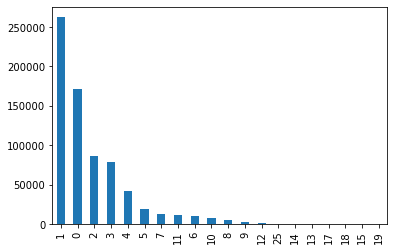

In [52]:
picking_df['time_for_shipping'].value_counts().plot(kind='bar')

In [89]:
avg_prod_shipping = pd.DataFrame()
avg_prod_shipping['avg_shipping_time'] = picking_df.groupby('material_num').agg({'time_for_shipping':'mean'})['time_for_shipping']
avg_prod_shipping['shipping_count'] = picking_df.groupby('material_num').agg({'time_for_shipping':'count'})['time_for_shipping']
avg_prod_shipping = avg_prod_shipping.sort_values('avg_shipping_time').reset_index()
avg_prod_shipping.query('avg_shipping_time == 0 and shipping_count > 10')
# orders for below products are immediate

,material_num,avg_shipping_time,shipping_count
2,PL07872A,0.0,54
5,TR00818B,0.0,13
14,TR02034B,0.0,17
19,CN06559A,0.0,13
22,61010324,0.0,29


In [90]:
avg_cust_shipping = pd.DataFrame()
avg_cust_shipping['avg_shipping_time'] = picking_df.groupby('customer_num').agg({'time_for_shipping':'mean'})['time_for_shipping']
avg_cust_shipping['shipping_count'] = picking_df.groupby('customer_num').agg({'time_for_shipping':'count'})['time_for_shipping']
avg_cust_shipping = avg_cust_shipping.sort_values('avg_shipping_time').reset_index()
avg_cust_shipping.query('avg_shipping_time == 0 and shipping_count > 10')
# below customers give their orders immediate, same day shipping

,customer_num,avg_shipping_time,shipping_count
0,M982,0.0,32
2,M788,0.0,13
4,C10282,0.0,51
6,C10244,0.0,36
7,M597,0.0,20
10,M961,0.0,28
12,M147,0.0,11
13,M98,0.0,45
18,M449,0.0,17


In [55]:
oper_type_counts = picking_df.groupby('material_num')['operation_type'].nunique().reset_index()
oper_type_counts.sort_values(by=['operation_type'])

,material_num,operation_type
0,10000000,1
454,FTR16078,1
455,FZA02593,1
456,GB00583A,1
457,GR01670A,1
...,...,...
231,61006514,1
232,61006515,1
233,61006609,1
225,61006004,1


## assumptions 

1. all orders will be ready at the end of shipping date
2. all orders are recieved at the beginning of receive date
3. picking is done asap to be able to meet unexpected orders

## to do

1. only meet the constraints
2. add the future orders as predictions
3. balance the workload, not 10,1,3,22 waves for 4 days, should be 8,9,9,10
4. minimize the workload for sunday
5. add holidays

In [ ]:
picking_df.groupby(['order_num','material_num', ])

In [146]:
df = picking_df[['order_num', 'material_num', 'order_receive_date', 'shipping_date',
            'customer_num', 'operation_type', 'picked_amount']].copy()

In [147]:
df.sort_values(by=['order_receive_date', 'order_num'], inplace=True)

In [148]:
df.head()

,order_num,material_num,order_receive_date,shipping_date,customer_num,operation_type,picked_amount
0,72616784,61000058,2019-12-26,2020-01-02,C10005,O1,45
1,72616784,61000058,2019-12-26,2020-01-02,C10005,O1,45
2,72616784,61000058,2019-12-26,2020-01-02,C10005,O1,45
3,72616784,61000058,2019-12-26,2020-01-02,C10005,O1,45
4,72616784,61000058,2019-12-26,2020-01-02,C10005,O1,45


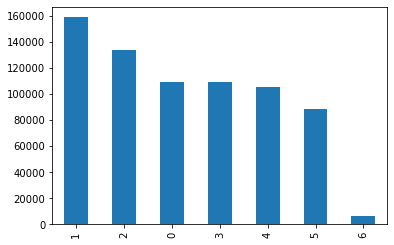

In [149]:
df['shipping_date'].dt.weekday.value_counts().plot(kind='bar')

In [150]:
df[df['order_receive_date']=='2020-02-03']

,order_num,material_num,order_receive_date,shipping_date,customer_num,operation_type,picked_amount
29170,72620915,61001960,2020-02-03,2020-02-03,C10123,O1,38
29171,72620916,61001960,2020-02-03,2020-02-03,C10134,O1,9
29172,72620916,61001960,2020-02-03,2020-02-03,C10134,O1,29
29173,72620916,TR01575A,2020-02-03,2020-02-03,C10134,O1,57
29174,72620916,TR01575A,2020-02-03,2020-02-03,C10134,O1,3
...,...,...,...,...,...,...,...
701279,9308389079,355940,2020-02-03,2020-02-06,M1327,O2,530
701280,9308389079,4050584,2020-02-03,2020-02-06,M1327,O2,220
701281,9308389079,4047491,2020-02-03,2020-02-06,M1327,O2,288
701282,9308389079,4047491,2020-02-03,2020-02-06,M1327,O2,288


In [183]:
checklist = pd.DataFrame()
picking_plans = pd.DataFrame(columns=['date', 'wave_num','operation_type','order_num', 'customer_num', 'material_num', 
                                  'order_receive_date','shipping_date','picked_amount'])

# for date in pd.date_range(df['order_receive_date'].min(), df['order_receive_date'].max()):
for date in pd.date_range('2020-01-02', df['order_receive_date'].max()):    
    
    # updating checklist
    checklist = pd.concat([checklist, df[df['order_receive_date']==date].sort_values(by='shipping_date')], axis=0)
    checklist['time_for_shipping'] = (checklist['shipping_date'] - checklist['order_receive_date']).dt.days
    
    # creating must_pick orders list
    must_pick = checklist[checklist['time_for_shipping']==0]
    
    must_pick_O1 = must_pick[must_pick['operation_type']=='O1'].sort_values(by=['order_num', 'customer_num','material_num'], inplace=True)
    must_pick_O2 = must_pick[must_pick['operation_type']=='O2'].sort_values(by=['order_num', 'customer_num','material_num'], inplace=True)
    
    # check there is any item in must_pick list
    if len(must_pick_O1)>0:
        
        
        
    if len(must_pick_O1)>0:    
        
        
        
    # updating checklist
    checklist = checklist[checklist['time_for_shipping']>0]
    
    break

<ipython-input-183-61bd0ccbd911>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  must_pick.sort_values(by=['order_num', 'customer_num','material_num'], inplace=True)


In [185]:
must_pick.head(50)

,order_num,material_num,order_receive_date,shipping_date,customer_num,operation_type,picked_amount,time_for_shipping
38,72616887,61001960,2020-01-02,2020-01-02,C10008,O1,14,0
39,72616887,61001960,2020-01-02,2020-01-02,C10008,O1,44,0
40,72616887,61001960,2020-01-02,2020-01-02,C10008,O1,2,0
41,72616888,61000066,2020-01-02,2020-01-02,C10185,O1,12,0
42,72616888,61000066,2020-01-02,2020-01-02,C10185,O1,13,0
45,72616888,61001960,2020-01-02,2020-01-02,C10185,O1,30,0
43,72616888,61001960,2020-01-02,2020-01-02,C10185,O1,19,0
44,72616888,61001960,2020-01-02,2020-01-02,C10185,O1,1,0
47,72616889,61000066,2020-01-02,2020-01-02,C10188,O1,7,0
46,72616889,61000066,2020-01-02,2020-01-02,C10188,O1,33,0


In [181]:
aa = pd.DataFrame([[1,2,3,4,5,6,7,8,9]])

,0,1,2,3,4,5,6,7,8
0,1,2,3,4,5,6,7,8,9


In [ ]:
pd.DataFrame({'date':2, 'wave_num':1, 'operation_type':1, 'order_num':2, 'customer_num':'asd',
       'material_num':2, 'order_receive_date':2, 'shipping_date':'a', 'picked_amount':1}, index=)

In [182]:
pd.concat([picking_plans, pd.DataFrame([[1,2,3,4,5,6,7,8,9]])], ignore_index=True)

,0,1,2,3,4,5,6,7,8,customer_num,date,material_num,operation_type,order_num,order_receive_date,picked_amount,shipping_date,wave_num
0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
picking_plans.iloc[0] = [1,2,3,4,5,6,7,1,8]

IndexError: single positional indexer is out-of-bounds

In [153]:
a = pd.DataFrame()
if a:
    print('asd')

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [152]:
must_pick.sort_values(by=['order_num', 'customer_num','material_num'], inplace=True).head(20)

,order_num,material_num,order_receive_date,shipping_date,customer_num,operation_type,picked_amount,time_for_shipping
38,72616887,61001960,2020-01-02,2020-01-02,C10008,O1,14,0
39,72616887,61001960,2020-01-02,2020-01-02,C10008,O1,44,0
40,72616887,61001960,2020-01-02,2020-01-02,C10008,O1,2,0
41,72616888,61000066,2020-01-02,2020-01-02,C10185,O1,12,0
42,72616888,61000066,2020-01-02,2020-01-02,C10185,O1,13,0
45,72616888,61001960,2020-01-02,2020-01-02,C10185,O1,30,0
43,72616888,61001960,2020-01-02,2020-01-02,C10185,O1,19,0
44,72616888,61001960,2020-01-02,2020-01-02,C10185,O1,1,0
47,72616889,61000066,2020-01-02,2020-01-02,C10188,O1,7,0
46,72616889,61000066,2020-01-02,2020-01-02,C10188,O1,33,0


In [ ]:
for each day:
    update the checklist with received orders
    pick the must_pick orders (must_pick orders are the ones that will be picked that day)
        min waves 
            if the picker is not full, add more items from the list
            find the closest one check 
        check the constraints
            O1 <= 25k
            O2 <= 175k
            # of material <= 8
            
    update checklist
        